<a href="https://colab.research.google.com/github/VyjayantiN/FMML-Projects-Assignments-2023/blob/main/FMML_Module4_Lab2_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [2]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

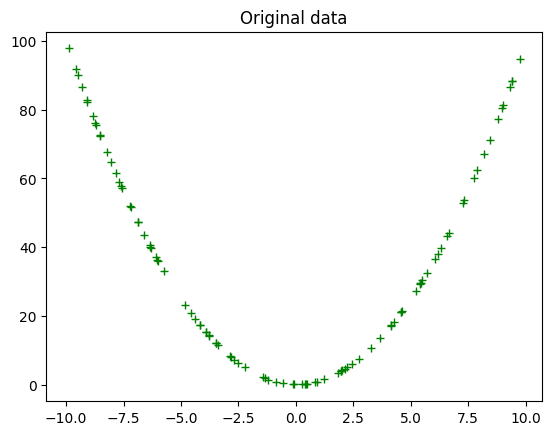

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [4]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


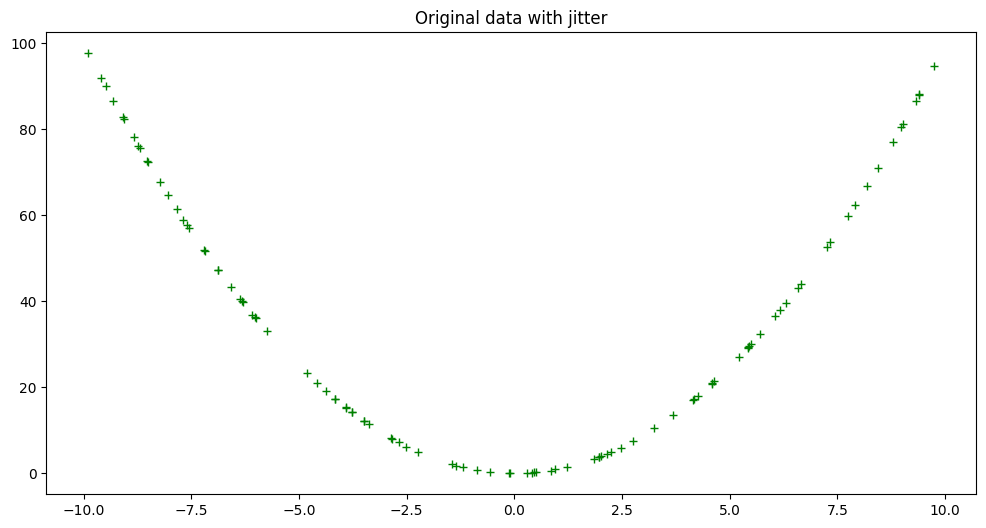

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [6]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

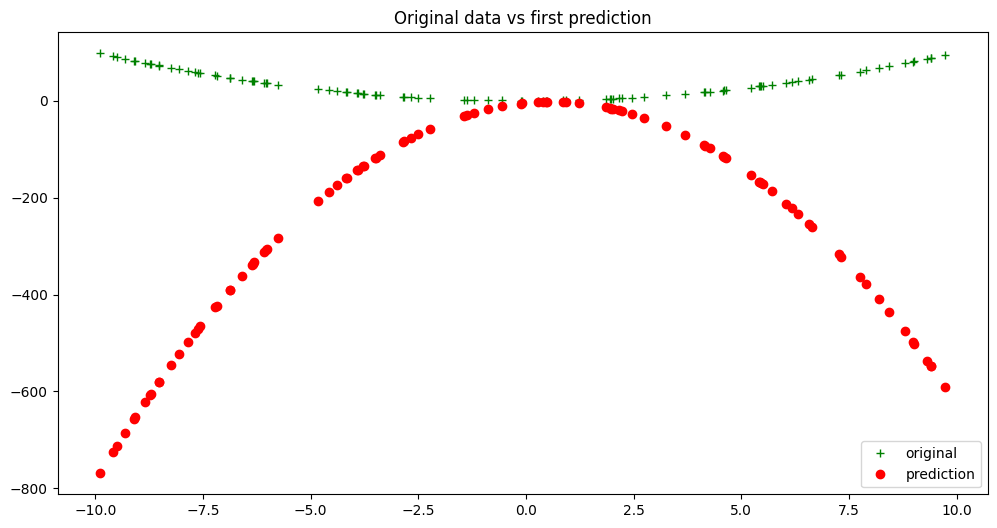

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

146807.86204726336

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [9]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [10]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-3.4872074852403587, 7.879149056895183, -4.941405407033594)
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


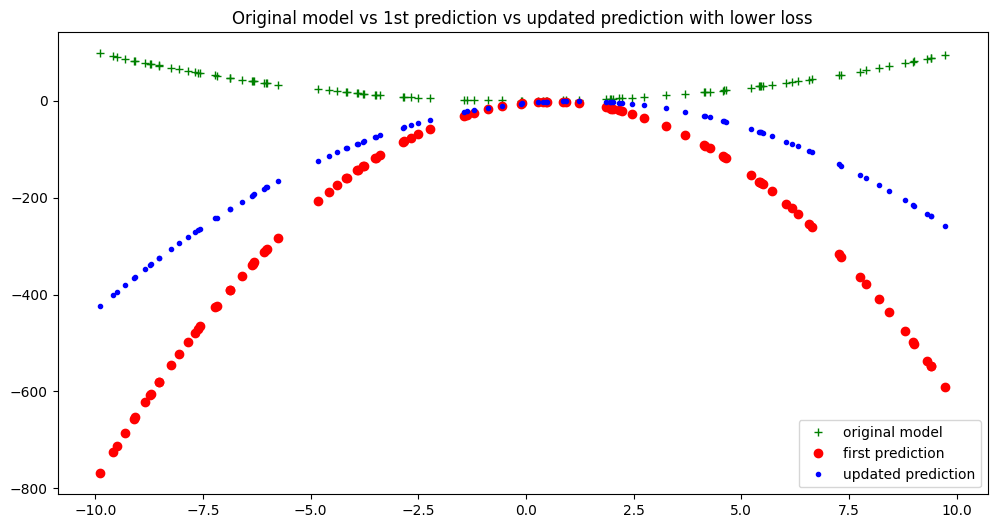

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [12]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [13]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [14]:
GD = gradient_descent(30000, 0.0003)


[13475.624637116503, 2869.715432846906, 1958.273415665309, 1815.4133533665963, 1736.1622571518062, 1664.7307185029726, 1596.5981613153112, 1531.2972754982177, 1468.6853640008349, 1408.6497165327594, 1351.0841647769712, 1295.8870592843532, 1242.960945034913, 1192.2123779132319, 1143.5517588087196, 1096.8931753375862, 1052.154250140267, 1009.2559954258945, 968.1226735021916, 928.6816630441622, 890.8633308653946, 854.6009089655777, 819.8303766371265, 786.4903474227408, 754.5219607243141, 723.8687778717832, 694.476682468427, 666.2937848366366, 639.2703303954412, 613.3586118080115, 588.5128847440168, 564.6892871080927, 541.8457615918065, 519.9419814123638, 498.9392791069297, 478.8005782568453, 459.49032802117404, 440.9744403639862, 423.2202298645435, 406.1963560041051, 389.8727678274495, 374.22065088139925, 359.2123763366603, 344.8214522031347, 331.0224765525732, 317.7910926659628, 305.1039460264636, 292.9386430819466, 281.27371170432554, 270.0885632758611, 259.3634563354952, 249.0794617210

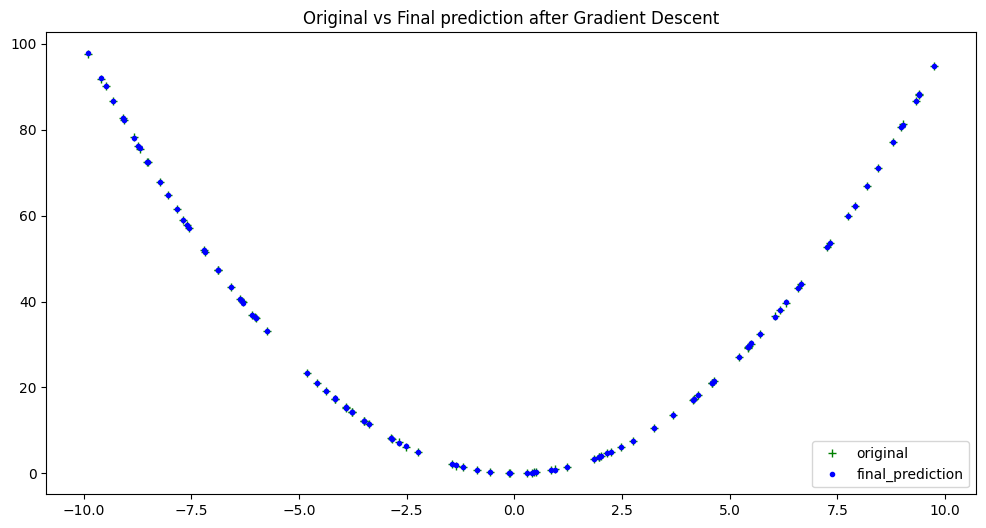

In [15]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [16]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


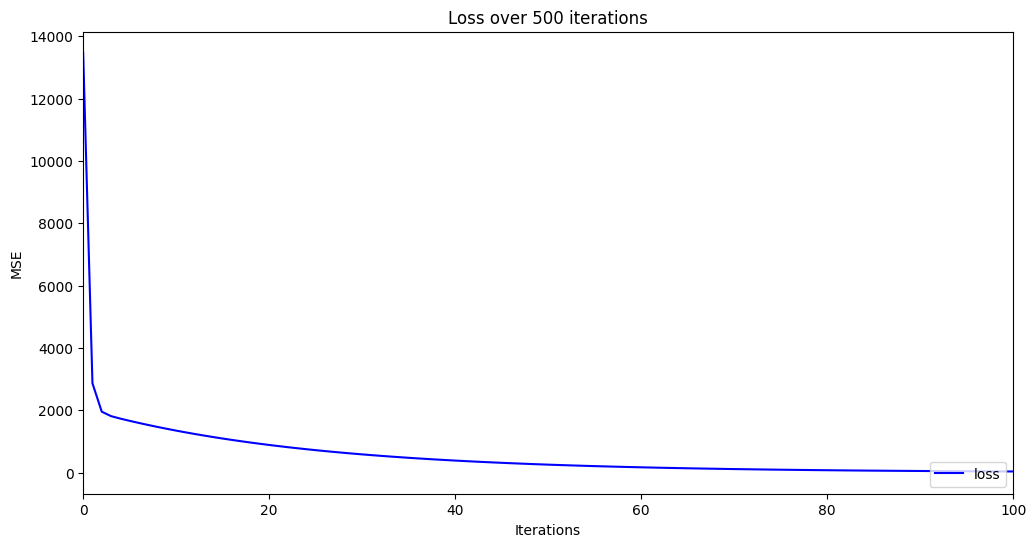

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



# **ANSWERS**

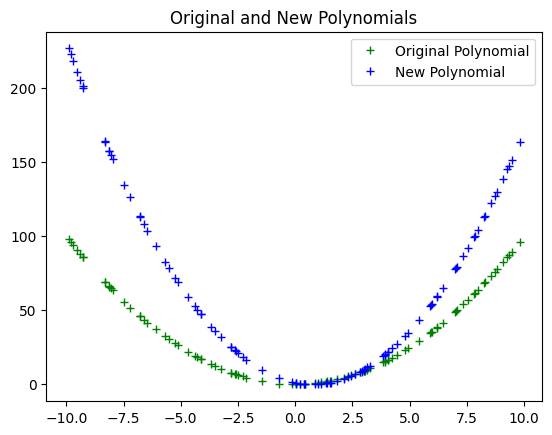

In [19]:
# QUESTION 1 - Change the coefficients array and try a different polynomial instead of our  x2

import numpy as np
import random
import matplotlib.pyplot as plt

# Original code for polynomial evaluation
def eval_2nd_degree(coeffs, x):
    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

# Generate random x values for original code
hundred_xs = np.random.uniform(-10, 10, 100)
original_coeffs = [1, 0, 0]
ys_original = [eval_2nd_degree(original_coeffs, x) for x in hundred_xs]

# New coefficients for a different polynomial
new_coeffs = [2, -3, 1]
# Evaluate the new polynomial
ys_new = [eval_2nd_degree(new_coeffs, x) for x in hundred_xs]


plt.plot(hundred_xs, ys_original, 'g+', label='Original Polynomial')
plt.plot(hundred_xs, ys_new, 'b+', label='New Polynomial')
plt.title('Original and New Polynomials')
plt.legend()
plt.show()


**QUESTION 2**

The learning rate is an important hyperparameter in gradient descent. It determines the size of the steps taken during each iteration. Setting it too high might cause overshooting and prevent convergence, while setting it too low might result in slow convergence.


<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-12-bad7532be911>:32: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-12-bad7532be911>:33: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-12-bad7532be911>:37: RuntimeWarning: invalid value encountered in double_scalars
  a_new = coeffs[0] - lr * gradient_a


Losses with learning rate 0.01: [204467029.6959508, 342192741613.87964, 572693411457675.2, 9.584590939575973e+17, 1.6040761363996724e+21, 2.684580142844095e+24, 4.492910517033668e+27, 7.519330338443932e+30, 1.258434338371214e+34, 2.1061143914572603e+37, 3.524790841010039e+40, 5.899086262010566e+43, 9.87270459335111e+46, 1.6522948073377665e+50, 2.7652788600541646e+53, 4.627967805686687e+56, 7.745362075365116e+59, 1.2962629862029261e+63, 2.1694243768720377e+66, 3.6307463663317606e+69, 6.076413318282177e+72, 1.0169478969113755e+76, 1.7019629358011416e+79, 2.848403387861359e+82, 4.7670849284158736e+85, 7.978188346346647e+88, 1.335228766543773e+92, 2.2346374660638313e+95, 3.7398869241426615e+98, 6.259070841593824e+101, 1.0475174408935054e+105, 1.7531240926115813e+108, 2.9340266463473976e+111, 4.910383924193692e+114, 8.218013395685056e+117, 1.3753658616978435e+121, 2.3018108665009886e+124, 3.85230825680188e+127, 6.447219066257529e+130, 1.0790059080791862e+134, 1.805823158333615e+137, 3.02222

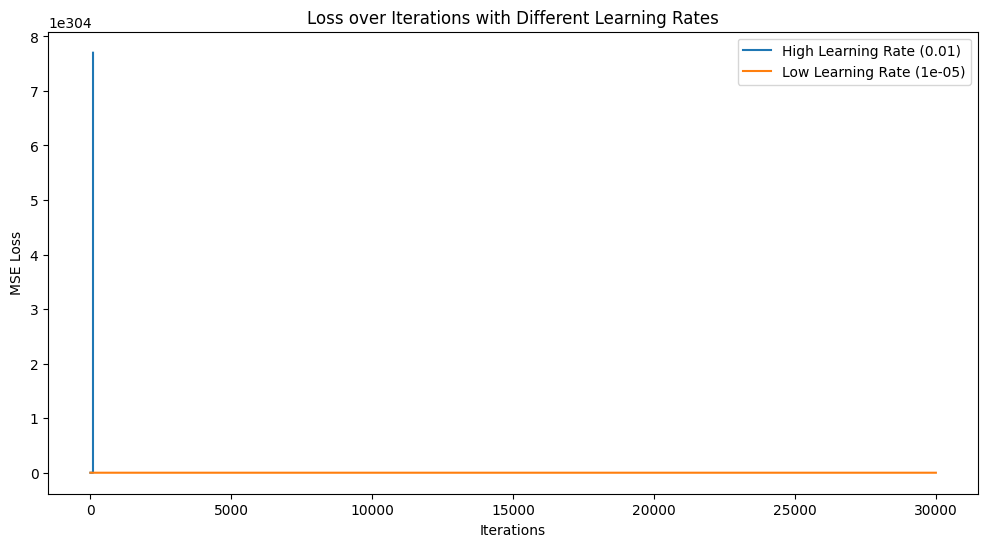

In [20]:
# QUESTION 2
import numpy as np
import random
import matplotlib.pyplot as plt

# Original code for gradient descent
# ...

# Function to perform gradient descent with a specified learning rate
def gradient_descent_lr(epochs, lr):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])

    # Print the losses to observe convergence
    print(f"Losses with learning rate {lr}: {losses}")

    return loss[0], loss[1], loss[2], losses

# Try different learning rates
high_lr = 0.01
low_lr = 0.00001
GD_high_lr = gradient_descent_lr(30000, high_lr)
GD_low_lr = gradient_descent_lr(30000, low_lr)

# Plot the loss curves for different learning rates
plt.figure(figsize=(12, 6))
plt.plot(GD_high_lr[3], label=f'High Learning Rate ({high_lr})')
plt.plot(GD_low_lr[3], label=f'Low Learning Rate ({low_lr})')
plt.title('Loss over Iterations with Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


 **QUESTION 3**




Yes, it is likely that the gradient descent will converge to different values for the coefficients with different initializations.
The convergence behavior depends on the shape of the optimization landscape, and different initializations can lead the model to different local minima.


For the case of a degree 2 polynomial, such as
ax^2+bx+c, the optimization landscape is simpler and generally has a single global minimum.
The quadratic function is convex, meaning it has a well-defined minimum point, and the optimization process will naturally converge to that minimum, regardless of the initial values.

Losses for coefficients (0.32863790885247823, -0.9659646960595096, -0.4568056418733164, 0.4838156375779634, -0.10784478786831664, 0.6851401101717403): [-3.029727313761363, -3.0287926106608185, -3.0278581738049404, -3.026924003124588, -3.0259900985506274, -3.0250564600139547, -3.0241230874454703, -3.0231899807761056, -3.0222571399367952, -3.0213245648585088, -3.020392255472208, -3.0194602117089007, -3.018528433499589, -3.0175969207753024, -3.016665673467086, -3.015734691506006, -3.0148039748231383, -3.013873523349584, -3.0129433370164485, -3.0120134157548786, -3.011083759496009, -3.0101543681710106, -3.0092252417110696, -3.0082963800473816, -3.007367783111166, -3.0064394508336565, -3.0055113831461098, -3.0045835799797906, -3.003656041265987, -3.002728766936002, -3.0018017569211572, -3.00087501115279, -2.999948529562254, -2.999022312080924, -2.9980963586401868, -2.997170669171452, -2.9962452436061437, -2.9953200818757013, -2.9943951839115845, -2.993470549645262, -2.992546179008235, -2.99

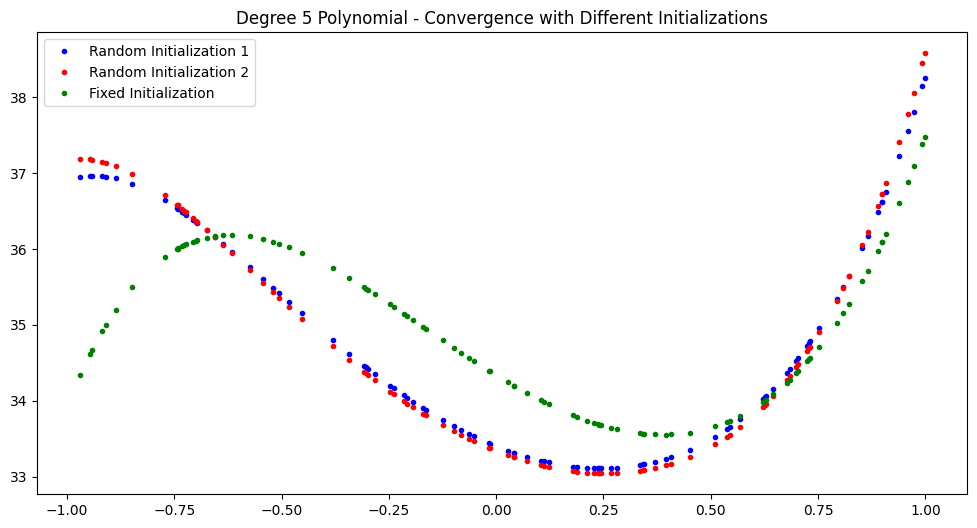

In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# Original code for gradient descent
def eval_5th_degree(coeffs, x):
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

def calc_gradient_5th_poly(coeffs, inputs_x, outputs_y):
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_pow_5 = x ** 5
        x_pow_4 = x ** 4
        x_pow_3 = x ** 3
        x_pow_2 = x ** 2
        x_pow_1 = x
        partial_a = x_pow_5 * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x_pow_4 * (y - y_bar)
        b_s.append(partial_b)
        partial_c = x_pow_3 * (y - y_bar)
        c_s.append(partial_c)
        partial_d = x_pow_2 * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x_pow_1 * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(outputs_y)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)

    return (gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f)

def gradient_descent_5th_degree(epochs, lr, coeffs):
    losses = []
    rand_coeffs_to_test = coeffs
    for i in range(epochs):
        loss = calc_gradient_5th_poly(rand_coeffs_to_test, hundred_xs, ys)
        rand_coeffs_to_test = tuple(c - lr * g for c, g in zip(rand_coeffs_to_test, loss))
        losses.append(loss[0])

    print(f"Losses for coefficients {coeffs}: {losses}")

    return loss[0], rand_coeffs_to_test, [eval_5th_degree(rand_coeffs_to_test, x) for x in hundred_xs]

hundred_xs = np.random.uniform(-1, 1, 100)  # Normalizing the x values

# Coefficients for a degree 5 polynomial with 5 roots
degree_5_coeffs = [1, -4, 4, -4, 1, 0]

# Random initialization for coefficients
rand_coeffs_5_init_1 = tuple(random.uniform(-1, 1) for _ in range(6))  # Normalizing the initial coefficients
rand_coeffs_5_init_2 = tuple(random.uniform(-1, 1) for _ in range(6))

# Perform gradient descent with different initializations
GD_degree_5_rand_init_1 = gradient_descent_5th_degree(30000, 0.0001, rand_coeffs_5_init_1)
GD_degree_5_rand_init_2 = gradient_descent_5th_degree(30000, 0.0001, rand_coeffs_5_init_2)
GD_degree_5_fixed_init = gradient_descent_5th_degree(30000, 0.0001, degree_5_coeffs)

# Plot the results for different initializations
plt.figure(figsize=(12, 6))
plt.plot(hundred_xs, GD_degree_5_rand_init_1[2], 'b.', label='Random Initialization 1')
plt.plot(hundred_xs, GD_degree_5_rand_init_2[2], 'r.', label='Random Initialization 2')
plt.plot(hundred_xs, GD_degree_5_fixed_init[2], 'g.', label='Fixed Initialization')
plt.title('Degree 5 Polynomial - Convergence with Different Initializations')
plt.legend()
plt.show()


**QUESTION 4**

To modify the algorithm to find the maximum of a function, we can change the signs of the gradients and update equations.

Losses for coefficients (-0.3683874593023453, -0.5507013958253077, -0.7389000286113507, -0.18204942228044874, 0.3030913541558189, 0.2053557905307588): [4.2836887958031244, 4.284625260737264, 4.285561947142643, 4.2864988550713194, 4.287435984575365, 4.288373335706861, 4.289310908517901, 4.290248703060593, 4.291186719387049, 4.292124957549414, 4.293063417599818, 4.294002099590417, 4.294941003573383, 4.295880129600893, 4.296819477725136, 4.297759047998324, 4.298698840472665, 4.299638855200394, 4.3005790922337495, 4.301519551624982, 4.302460233426356, 4.303401137690155, 4.304342264468667, 4.30528361381419, 4.306225185779042, 4.307166980415543, 4.30810899777604, 4.309051237912884, 4.3099937008784295, 4.31093638672506, 4.311879295505165, 4.3128224272711355, 4.313765782075391, 4.314709359970353, 4.315653161008466, 4.316597185242165, 4.31754143272392, 4.318485903506208, 4.319430597641509, 4.320375515182327, 4.321320656181166, 4.322266020690558, 4.323211608763032, 4.324157420451134, 4.325103455

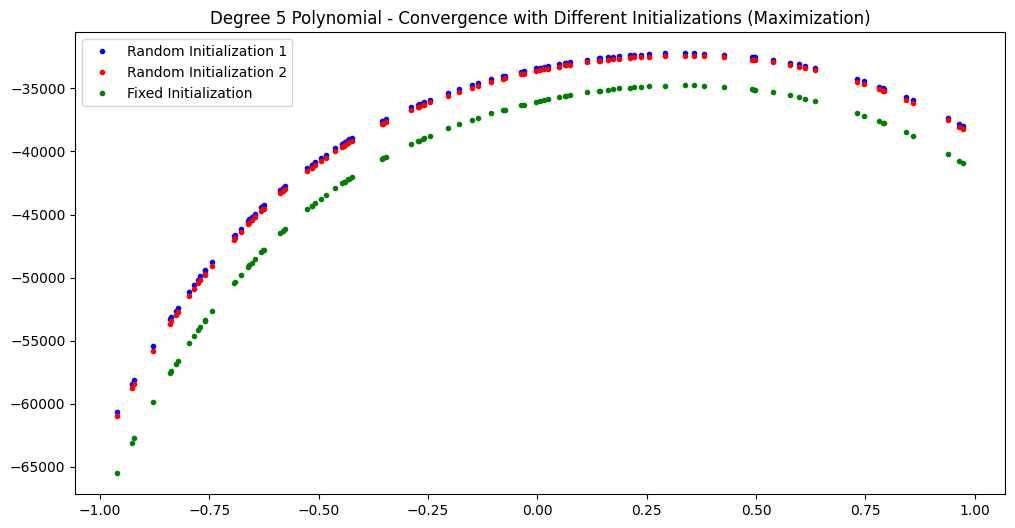

In [24]:
# QUESTION 4
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings

# Suppress runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Original code for gradient ascent (maximization)
def eval_5th_degree(coeffs, x):
    a, b, c, d, e, f = coeffs
    y = a * (x ** 5) + b * (x ** 4) + c * (x ** 3) + d * (x ** 2) + e * x + f
    return y

def calc_gradient_5th_poly(coeffs, inputs_x, outputs_y):
    a, b, c, d, e, f = coeffs
    a_s, b_s, c_s, d_s, e_s, f_s = 0, 0, 0, 0, 0, 0

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_pow_5 = x ** 5
        x_pow_4 = x ** 4
        x_pow_3 = x ** 3
        x_pow_2 = x ** 2
        x_pow_1 = x

        a_s += x_pow_5 * (y_bar - y)
        b_s += x_pow_4 * (y_bar - y)
        c_s += x_pow_3 * (y_bar - y)
        d_s += x_pow_2 * (y_bar - y)
        e_s += x_pow_1 * (y_bar - y)
        f_s += (y_bar - y)

    n = len(outputs_y)

    gradient_a = (2 / n) * a_s
    gradient_b = (2 / n) * b_s
    gradient_c = (2 / n) * c_s
    gradient_d = (2 / n) * d_s
    gradient_e = (2 / n) * e_s
    gradient_f = (2 / n) * f_s

    return (gradient_a, gradient_b, gradient_c, gradient_d, gradient_e, gradient_f)

def gradient_ascent_5th_degree(epochs, lr, coeffs):
    losses = []
    rand_coeffs_to_test = coeffs
    for i in range(epochs):
        loss = calc_gradient_5th_poly(rand_coeffs_to_test, hundred_xs, ys)
        rand_coeffs_to_test = tuple(c + lr * g for c, g in zip(rand_coeffs_to_test, loss))
        losses.append(loss[0])

    print(f"Losses for coefficients {coeffs}: {losses}")

    return loss[0], rand_coeffs_to_test, [eval_5th_degree(rand_coeffs_to_test, x) for x in hundred_xs]

# Generate random x values
hundred_xs = np.random.uniform(-1, 1, 100)  # Normalizing the x values

# Coefficients for a degree 5 polynomial with 5 roots
degree_5_coeffs = [1, -4, 4, -4, 1, 0]

# Random initialization for coefficients
rand_coeffs_5_init_1 = tuple(random.uniform(-1, 1) for _ in range(6))  # Normalizing the initial coefficients
rand_coeffs_5_init_2 = tuple(random.uniform(-1, 1) for _ in range(6))

# Perform gradient ascent with different initializations
GA_degree_5_rand_init_1 = gradient_ascent_5th_degree(30000, 0.0001, rand_coeffs_5_init_1)
GA_degree_5_rand_init_2 = gradient_ascent_5th_degree(30000, 0.0001, rand_coeffs_5_init_2)
GA_degree_5_fixed_init = gradient_ascent_5th_degree(30000, 0.0001, degree_5_coeffs)

# Plot the results for different initializations
plt.figure(figsize=(12, 6))
plt.plot(hundred_xs, GA_degree_5_rand_init_1[2], 'b.', label='Random Initialization 1')
plt.plot(hundred_xs, GA_degree_5_rand_init_2[2], 'r.', label='Random Initialization 2')
plt.plot(hundred_xs, GA_degree_5_fixed_init[2], 'g.', label='Fixed Initialization')
plt.title('Degree 5 Polynomial - Convergence with Different Initializations (Maximization)')
plt.legend()
plt.show()
